In [102]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline

In [103]:
data = pd.read_csv(r'C:\Users\Hp\Downloads\Dataset.csv')

data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [104]:
data = data.drop(['CUST_ID'],axis=1)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [105]:
data2 = data.dropna(thresh=6250,axis=1)


In [106]:
column_means = data2.mean()
data2 = data2.fillna(column_means)
data2



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


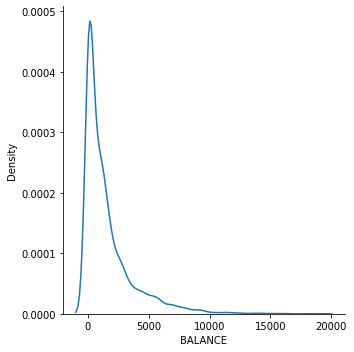

In [107]:
sns.displot(data2, x="BALANCE", kind="kde")

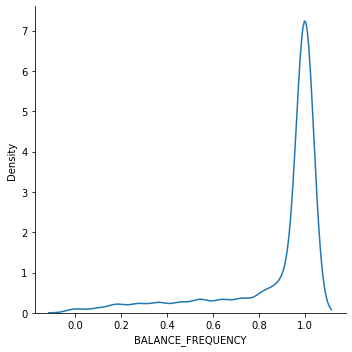

In [108]:

sns.displot(data, x="BALANCE_FREQUENCY", kind="kde")

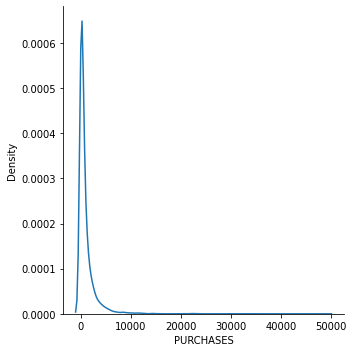

In [109]:
sns.displot(data2, x="PURCHASES", kind="kde")

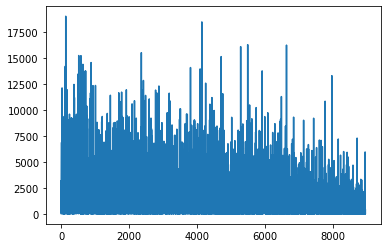

In [110]:
y=data2['BALANCE']

plt.plot(y)
plt.show()

In [111]:
data2.skew(axis = 0, skipna = True)

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [112]:
data_sqrt = np.sqrt(data2)
data_sqrt

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.395369,0.904534,9.767292,0.000000,9.767292,0.000000,0.408249,0.000000,0.288675,0.000000,0.000000,1.414214,31.622777,14.205706,11.811426,0.000000,3.464102
1,56.590347,0.953463,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.500000,2.000000,0.000000,83.666003,64.054919,32.746606,0.471404,3.464102
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.464102,86.602540,24.941266,25.045654,0.000000,3.464102
3,40.824877,0.797724,38.716921,38.716921,0.000000,14.345313,0.288675,0.288675,0.000000,0.288675,1.000000,1.000000,86.602540,0.000000,29.397390,0.000000,3.464102
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.000000,1.000000,34.641016,26.044861,15.645806,0.000000,3.464102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,5.337932,1.000000,17.062239,0.000000,17.062239,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,18.044236,6.991879,0.707107,2.449490
8946,4.379865,1.000000,17.320508,0.000000,17.320508,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,16.609073,29.397390,0.000000,2.449490
8947,4.837217,0.912871,12.016655,0.000000,12.016655,0.000000,0.912871,0.000000,0.816497,0.000000,0.000000,2.236068,31.622777,9.015031,9.078456,0.500000,2.449490
8948,3.668455,0.912871,0.000000,0.000000,0.000000,6.046386,0.000000,0.000000,0.000000,0.408249,1.414214,0.000000,22.360680,7.249135,7.466969,0.500000,2.449490


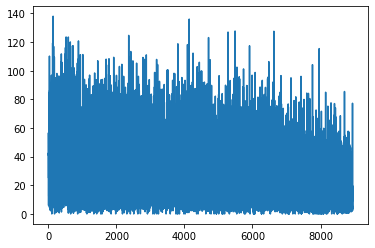

In [113]:
x = data_sqrt['BALANCE']
plt.plot(x)
plt.show()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

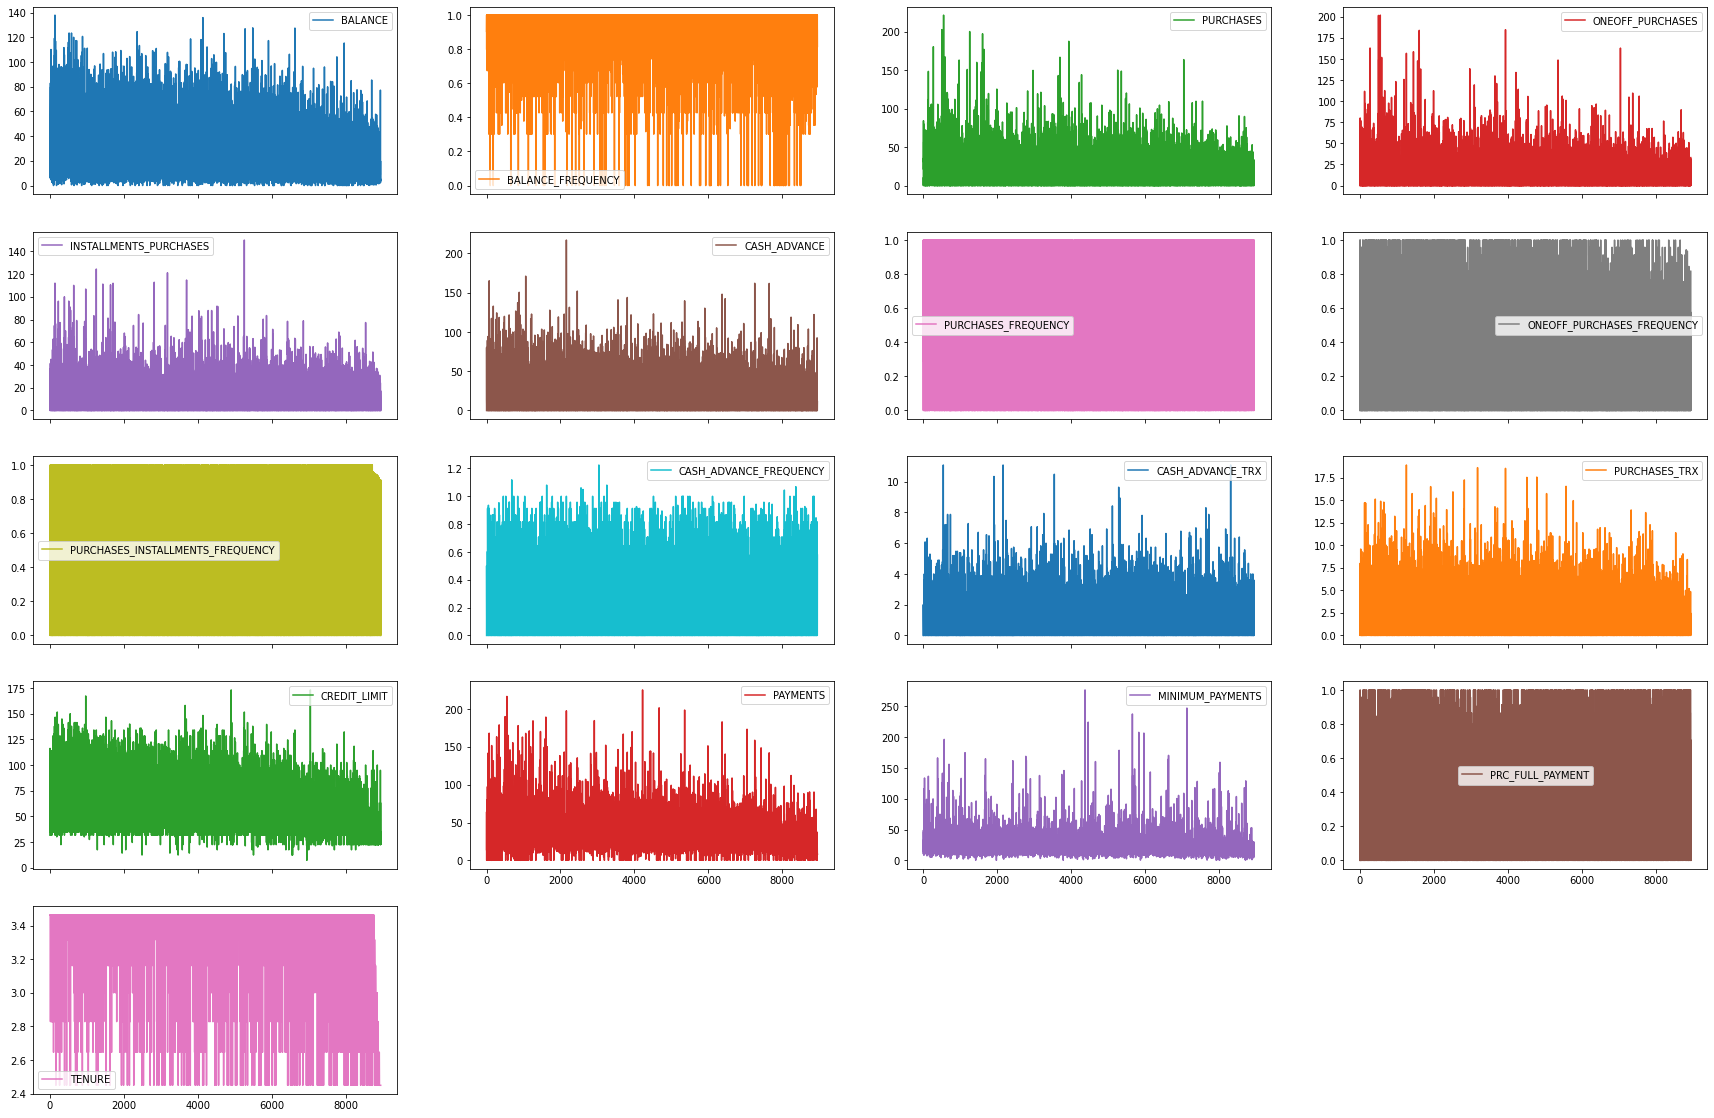

In [114]:
data_sqrt.plot(subplots=True, layout=(5,4), figsize=(30,20))

In [115]:
data_sqrt.skew(axis = 0, skipna = True)

BALANCE                             0.829498
BALANCE_FREQUENCY                  -2.819495
PURCHASES                           1.730752
ONEOFF_PURCHASES                    2.129460
INSTALLMENTS_PURCHASES              1.546939
CASH_ADVANCE                        1.486159
PURCHASES_FREQUENCY                -0.421872
ONEOFF_PURCHASES_FREQUENCY          0.724607
PURCHASES_INSTALLMENTS_FREQUENCY    0.130409
CASH_ADVANCE_FREQUENCY              0.706976
CASH_ADVANCE_TRX                    1.417779
PURCHASES_TRX                       1.185757
CREDIT_LIMIT                        0.680933
PAYMENTS                            1.951535
MINIMUM_PAYMENTS                    3.805340
PRC_FULL_PAYMENT                    1.297280
TENURE                             -3.064332
dtype: float64

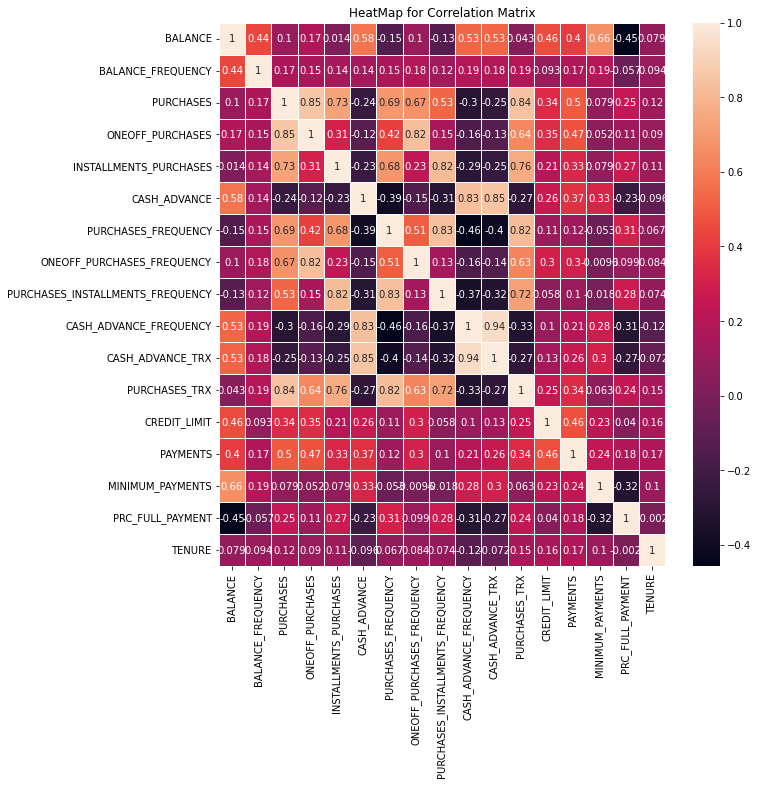

In [116]:
corrMat = data_sqrt.corr()
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( corrMat, linewidth = 1 , annot = True)
plt.title( "HeatMap for Correlation Matrix" )
plt.show()

In [117]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data_sqrt)
std_data = pd.DataFrame(std_data)
std_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.078055,-0.097126,-0.596901,-0.724371,-0.209397,-0.732851,-0.455097,-0.881832,-0.350094,-0.861347,-0.772904,-0.578392,-1.212811,-0.885440,-0.667902,-0.636182,0.353481
1,1.053619,0.190539,-1.042337,-0.724371,-0.837899,2.447876,-1.511903,-0.881832,-1.040015,0.933739,0.629493,-1.136616,0.855514,1.274046,0.522544,0.788874,0.353481
2,0.771680,0.464146,0.225748,0.686250,-0.837899,-0.732851,1.076731,2.081316,-1.040015,-0.861347,-0.772904,0.230748,0.972220,-0.420372,0.084642,-0.636182,0.353481
3,0.384093,-0.725092,0.723342,1.239775,-0.837899,-0.164399,-0.764630,-0.026447,-1.040015,0.175044,-0.071706,-0.741892,0.972220,-1.500837,0.332096,-0.636182,0.353481
4,-0.135254,0.464146,-0.859918,-0.521447,-0.837899,-0.732851,-0.764630,-0.026447,-1.040015,-0.861347,-0.772904,-0.741892,-1.092859,-0.372564,-0.449866,-0.636182,0.353481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.122962,0.464146,-0.264216,-0.724371,0.260016,-0.732851,1.076731,-0.881832,1.141709,-0.861347,-0.772904,-0.169743,-1.212811,-0.719154,-0.941958,1.501403,-4.276127
8946,-1.163649,0.464146,-0.252438,-0.724371,0.276635,-0.732851,1.076731,-0.881832,1.141709,-0.861347,-0.772904,-0.169743,-1.212811,-0.781326,0.332096,-0.636182,-4.276127
8947,-1.144226,-0.048112,-0.494319,-0.724371,-0.064656,-0.732851,0.851185,-0.881832,0.911379,-0.861347,-0.772904,-0.253986,-1.212811,-1.110302,-0.823308,0.875319,-4.276127
8948,-1.193861,-0.048112,-1.042337,-0.724371,-0.837899,-0.493255,-1.511903,-0.881832,-1.040015,0.604336,0.218740,-1.136616,-1.580910,-1.186802,-0.914943,0.875319,-4.276127


Text(0, 0.5, 'Cumulative explained variance')

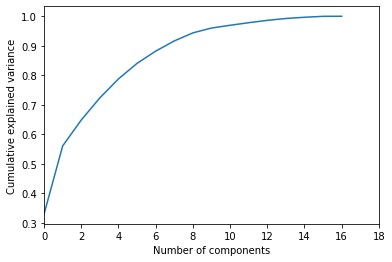

In [118]:
from sklearn.decomposition import PCA
pca = PCA().fit(std_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,18,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [119]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=7)
pca_data = sklearn_pca.fit_transform(std_data)
pca_data = pd.DataFrame(pca_data)
pca_data

,0,1,2,3,4,5,6
0,-0.885122,-2.483017,0.230902,0.807129,0.043370,-0.382026,-0.357206
1,-3.000343,2.015089,-0.165334,-1.087171,1.670938,-0.288015,0.942749
2,1.191726,0.385174,-1.926789,1.859338,-0.550103,-0.230068,0.522876
3,-0.794805,0.218433,-1.661542,1.195618,0.058950,0.798510,-0.086756
4,-1.265058,-1.593317,-0.689436,1.339644,-0.114019,-0.837737,0.231600
...,...,...,...,...,...,...,...
8945,0.668484,-2.871696,1.452469,-2.236975,-2.854943,0.766981,2.343375
8946,0.262604,-2.240280,1.844972,-0.568118,-3.339266,1.706628,1.774529
8947,0.105962,-3.066758,1.189320,-1.775107,-2.965850,1.263333,1.979732
8948,-2.847160,-2.517979,-0.295195,-2.148352,-2.990361,0.696690,1.774277


In [120]:
pca_data = pca_data.transform(lambda x: x*x)
pca_data

,0,1,2,3,4,5,6
0,0.783441,6.165373,0.053316,0.651457,0.001881,0.145944,0.127596
1,9.002061,4.060585,0.027335,1.181941,2.792035,0.082953,0.888776
2,1.420211,0.148359,3.712516,3.457137,0.302613,0.052931,0.273399
3,0.631715,0.047713,2.760721,1.429501,0.003475,0.637619,0.007527
4,1.600373,2.538660,0.475322,1.794645,0.013000,0.701803,0.053639
...,...,...,...,...,...,...,...
8945,0.446871,8.246640,2.109666,5.004059,8.150698,0.588260,5.491405
8946,0.068961,5.018853,3.403921,0.322758,11.150697,2.912578,3.148955
8947,0.011228,9.405002,1.414482,3.151006,8.796269,1.596011,3.919340
8948,8.106321,6.340221,0.087140,4.615415,8.942258,0.485377,3.148060


In [121]:
X = np.array(list(zip(pca_data[0], pca_data[1]))).reshape(len(pca_data[0]), 2)

In [122]:
inertias = []
mapping = {}
K = range(1, 10)
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    
    inertias.append(kmeanModel.inertia_)
  
    
    mapping[k] = kmeanModel.inertia_

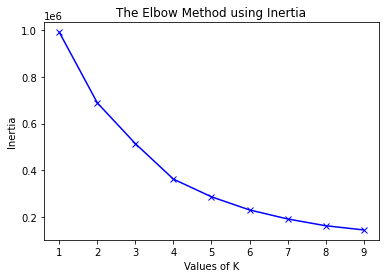

In [123]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

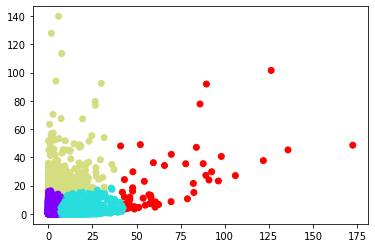

In [127]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')